
# Grip : The Sparks Foundation 
#Data Science and Business Analytics Intern 
#Author : Yashik Mendon 
#Task 1 : Prediction Using Supervised Machine Learning(ML)

In this task we have to predict the percentage score of a student based on the number of hours studied so in this task there are two variables where the feature is the no of hours studied and the target value is the percentage score so this can be solved using simple linear regreassion.

In [73]:
#Import all the necessary libraries for analysis:-
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
#Load the dataset
data = pd.read_csv("C:\\Users\\YASHIK\\Downloads\\student_scores1.csv")

In [85]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the data

In [92]:
print(data.shape)
data.head(10)


(25, 2)


,Hours,Scores
15,4.6,89
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [81]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,4.840000,51.240000
std,2.392175,24.881854
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.600000,47.000000
75%,6.900000,75.000000
max,9.200000,89.000000


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


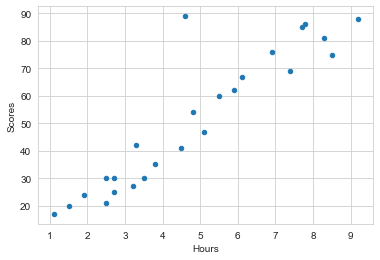

In [95]:
data.plot(kind = 'scatter',x = 'Hours',y='Scores')
plt.show()

In [22]:
data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.917214
Scores,0.917214,1.000000


In [24]:
data.corr(method = 'spearman')

,Hours,Scores
Hours,1.000000,0.912592
Scores,0.912592,1.000000


In [105]:
hours = data['Hours']
scores = data['Scores']

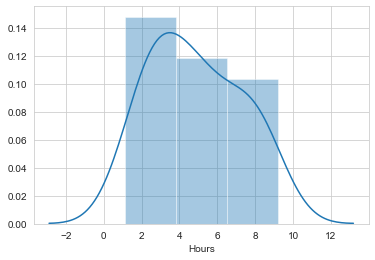

In [106]:
sns.distplot(hours)

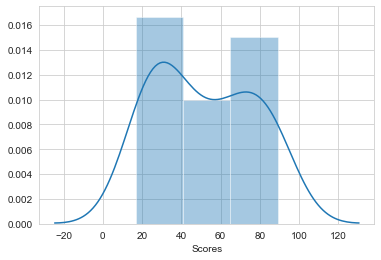

In [107]:
sns.distplot(scores)

# Linear Regression Model to train,test and split the data

In [53]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 50)



In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

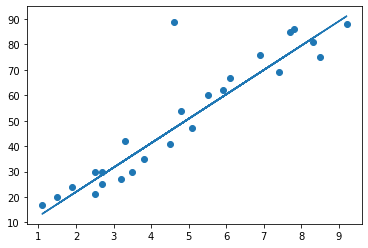

In [56]:
m = reg.coef_
c = reg.intercept_
line = m*X+c
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [62]:
y_pred = reg.predict(X_test)
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred}) 
actual_predicted


,Target,Predicted
0,89,46.950160
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


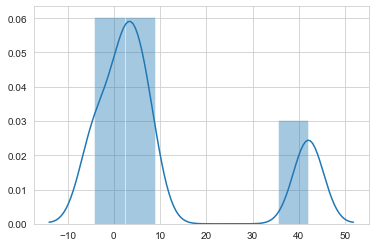

In [64]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

# So what would be the predicted score if a student studies for 9.25 hours per day?

In [66]:
hr = 9.25
s = reg.predict([[hr]])

In [69]:
print("If a Student studies for {} hours per day then he or she will score {} % in exam.".format(hr,s))

If a Student studies for 9.25 hours per day then he or she will score [91.56986604] % in exam.


# Model Evaluation

In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 11.643896172255207
R2 Score: 0.5267511951862791
